# Linear Regression

In [50]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [52]:
from IPython.display import Math, display

## Simple Linear Regression

Mathematically

$$Y \approx \beta_0 + \beta_1X + \epsilon$$

$Y$ - is the quantitative response/prediction (What we want to predict)

$X$ - single predictor variable.

We assume that there is **approximately** a linear relationship between $X$ and $Y$.

Where we sometimes say *we are regressing $Y$ on $X$ (or $Y$ onto $X$).


For example for the Advertising data $X$ may represent `TV` advertising and $Y$ represent `sales`, then we regress `sales` onto `TV` by fitting the model

$$sales \approx \beta_0 + \beta_1TV$$

In [5]:
ad_data = pd.read_csv('../data/Advertising.csv', index_col = "Unnamed: 0") 
print(ad_data.shape)
ad_data[['TV', 'sales']].head(3)

(200, 4)


,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3


$\beta_0$ and $\beta_1$ are 2 unkown constants that represent the *intercept* and *slope* terms of the linear model.

Together $\beta_0$ and $beta_1$ are known as the model **_coefficients/parameters_**.

$\beta_0$ - Y intercept i.e. mean value of Y when X = 0

$\beta_1$ slope of $X$ i.e. how much we expect $Y$ to change as $x$ increases or decreases

Once we have used our training data to produce estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients we can predict futre sales on the basis of a particular value of `TV` advertising by computing

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

where $\hat{y}$ indicates a single prediction of $Y$ on the basis of $X=x$

**Note** that  $\space\hat{}\space$   is used to denote estimated values for unknown coefficients or predicted value of the response

### Estimating the Coefficients

Out goal is to obtain coefficient estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ such that a linear model like the one below fitst the available data well, such that $y \approx \hat{\beta_0} + \hat{\beta_1}x_i$ for $i = 1,...,n$ where $n$ is the number of observations. In the Advertising data case $n = 200$

In other words we want to find the best possible **intercept** $\hat{\beta_0}$ and **slope** $\hat{\beta_1}$ such that the resulting line is as _close_ as possible to all actual values $y_$ of $n=200$ data points.

For instance below we visualize the best possible slope and intercept for the regression line estimating the $i$th `sale` $\hat{y_i}$ given the $i$th TV budget $x_i$

slope(bhat_1): 0.04753664043301974 || intercept(bhat_0): 7.032593549127695


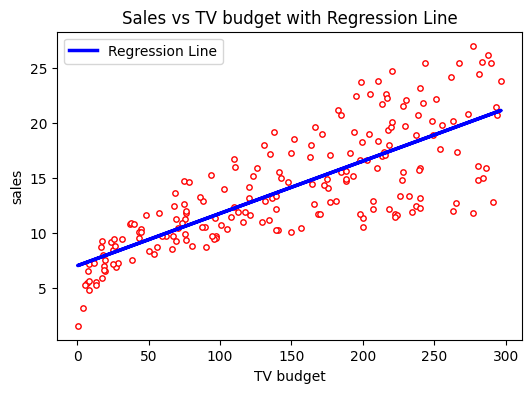

In [70]:
bhat_1, bhat_0 = np.polyfit(ad_data['TV'], ad_data['sales'], deg=1)
y_hat = bhat_0 + bhat_1*ad_data['TV']
print(f"slope(bhat_1): {bhat_1} || intercept(bhat_0): {bhat_0}")

fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(ad_data['TV'], ad_data['sales'], s=15, c='1', edgecolors='r')
ax.plot(ad_data['TV'], y_hat, color='b', lw=2.5, label="Regression Line")
ax.legend()
ax.set(xlabel='TV budget', ylabel='sales', title="Sales vs TV budget with Regression Line");

The most common approach for measuring and minimizing "_closeness_" by far is the **_least squares_** criterion.

This is whereby we want minimize the _residual sum of squares (RSS)_. 

We define a residual as $\enspace e_i \enspace$ where $\enspace e_i = y_i - \hat{y_i} \enspace$ representing the $i$th residual. In other words the difference between the $i$th observed response value(actual value) $y_i$ and the $i$th predicted response value $\hat{y_i}$. Where $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ 

Thus the **_RSS_** is defined as 

$$RSS = e_1^2 + e_2^2 + e_3^2 +...+e_n^2$$

or equivalently

$$RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x2)^2 +...+ (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2$$


For simple linear regression the _least squares_ approach minimizes the **_RSS_** using some calculus to choose the best slope and intercept $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the _least squares coefficient estimates_ for **S.L.R** are

$$\hat{\beta_1} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$$
$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

Where

$$\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$$
$$\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i$$



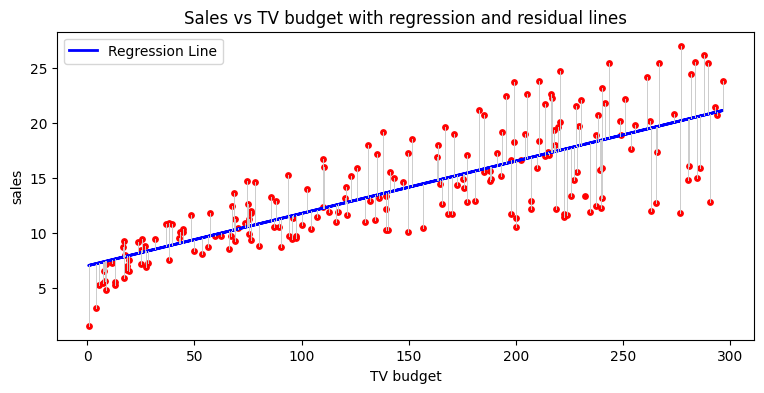

In [34]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.scatter(ad_data['TV'], ad_data['sales'], s=15, c='r', edgecolors='r')
ax.plot(ad_data['TV'], y_hat, c='b', lw=2, label='Regression Line')
for i in range(1, ad_data.shape[0]):
    ax.plot(
        [ad_data['TV'][i], ad_data['TV'][i]], 
        [ad_data['sales'][i], y_hat[i]],
        c ='0.8',
        ls ='-',
        lw = 0.7
    )
ax.legend()
ax.set(xlabel='TV budget', ylabel='sales', title="Sales vs TV budget with regression and residual lines");

_For the `Advertising` data, above is the least squares fit for the regression of `sales` onto `TV`. In this case a linear fit captures the essense of the relationship although it overestimates the trend in the left of the plot_

Below we define the function `least_squares_slr` that takes in the predictor variable (a.k.a independent variable/explanatory variable) X and the response variable (a.k.a dependent variable/predicted variable/explained variable) Y.

In [45]:
def least_squares_slr(X:pd.Series, Y:pd.Series) -> tuple:
    # Get slope
    slope = np.sum((X - X.mean())*(Y - Y.mean()))/np.sum((X - X.mean())**2)
    # Get intercept/lift/baseline
    intercept = Y.mean() - slope*X.mean()

    return slope, intercept

In the Advertising data:

- **Y** is `ad_data['sales']`
- **X** is `ad_data['TV']`

In [57]:
slope, intercept = least_squares_slr(ad_data['TV'], ad_data['sales'])
display(Math(f"\\beta_0 = {intercept}"))
display(Math(f"\\beta_1 = {slope}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

After the fitting a simple linear regression to the `Advertising` we get the above **intercept**/baseline and **slope**

In other words an additional \\$1,000 spent on TV advertising is associated with selling $\approx$ 47.5 additional units of the product

We can confirm that our $\beta_0$ and $\beta_1$ from our `least_squares_slr` matches the `np.polyfit` co-efficients for our regression line

In [79]:
print(round(bhat_0, 5) == round(intercept, 5), round(bhat_0, 5))
print(round(bhat_1, 5) == round(slope, 5), round(slope, 5))

True 7.03259
True 0.04754


#### Advertising Data Scatter Plot

In [49]:
print(ad_data.shape)
ad_data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [48]:
ad_data.describe()

296.4


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


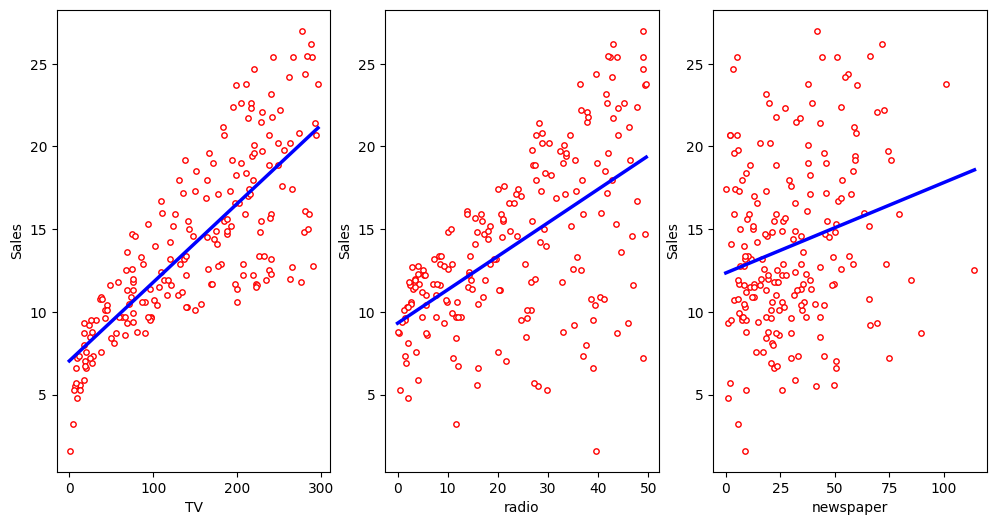

In [55]:
# Fit linear regression via least squares with a polynomial degree of 1 (linear fit)
# TV regression line
Tv_slope, Tv_intercept = np.polyfit(ad_data['TV'], ad_data['sales'], deg=1)
Tv_xseq = np.linspace(0, ad_data['TV'].max(), num=ad_data.shape[0])

# Radio regression line
radio_slope, radio_intercept = np.polyfit(ad_data['radio'], ad_data['sales'], deg=1)
radio_xseq = np.linspace(0, ad_data['radio'].max(), num=ad_data.shape[0])

# newspaper regression line
newspaper_slope, newspaper_intercept = np.polyfit(ad_data['newspaper'], ad_data['sales'], deg=1)
newspaper_xseq = np.linspace(0, ad_data['newspaper'].max(), num=ad_data.shape[0])

# TV vs Sales with regression line
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (12, 6))
ax1.scatter(ad_data['TV'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax1.plot(Tv_xseq, Tv_intercept+Tv_slope*Tv_xseq, color='b', lw=2.5);
ax1.set(xlabel="TV", ylabel="Sales")

# Radio vs Sales with regression line
ax2.scatter(ad_data['radio'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax2.plot(radio_xseq, radio_intercept+radio_slope*radio_xseq, color='b', lw=2.5);
ax2.set(xlabel="radio", ylabel="Sales")

# Newspaper vs Sales with regression line
ax3.scatter(ad_data['newspaper'], ad_data['sales'], s=15, c='1', edgecolors='r');
ax3.plot(newspaper_xseq, newspaper_intercept+newspaper_slope*newspaper_xseq, color='b', lw=2.5);
ax3.set(xlabel="newspaper", ylabel="Sales");

### Statsmodel

In [2]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm